# Bode Plot Tutorial — 1

**Topic:** First-order systems (lag) — magnitude & phase Bode plots

**Note:** If you don't have the library installed, run `!pip install control` in a cell.


## 1. Imports and settings

We import the control library and matplotlib. We'll set up plotting to show magnitude in dB and phase in degrees.

In [1]:
# Imports (run this cell to enable the examples)
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# make plots inline if using Jupyter
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,4)

## 2. Define a first-order lag (low-pass) transfer function

A typical first-order system in process control has the form:

$$G(s) = \frac{K}{\tau s + 1}$$

We'll pick $K=2$, $\tau=5$ as an example.

In [2]:
# Define a first-order system G(s) = K/(tau*s + 1)
K = 2.0
tau = 5.0
num = [K]
den = [tau, 1.0]
G1 = ct.tf(num, den)
print("First-order transfer function G1(s):", G1)

First-order transfer function G1(s): <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     2
  -------
  5 s + 1


## 3. Bode magnitude and phase

Use `control.bode_plot` to compute and plot the magnitude and phase. We will request a frequency range that covers decades around $1/τ$.



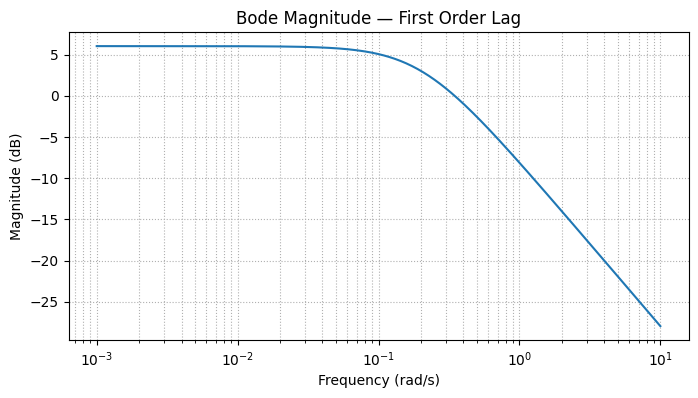

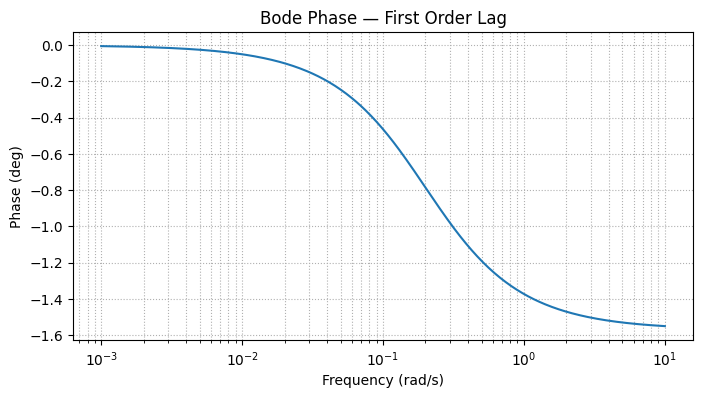

In [7]:
# Frequency vector spanning several decades around 1/tau
w = np.logspace(-3, 1, 500)  # rad/s

mag, phase, omega = ct.bode(G1, w, dB=True, deg=True, plot=False) 

# Plot magnitude (dB)
plt.figure()
plt.semilogx(omega, 20*np.log10(mag))  # mag returned as absolute
plt.title('Bode Magnitude — First Order Lag')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle=':')

# Plot phase (deg)
plt.figure()
plt.semilogx(omega, phase)
plt.title('Bode Phase — First Order Lag')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (deg)')
plt.grid(True, which='both', linestyle=':')

### 4. How to Read Bode Plots

A **Bode plot** shows the frequency response of a system using two graphs:

1. **Magnitude Plot (dB vs. frequency)**  
   - Shows how the amplitude of the output changes with input frequency.  
   - **High magnitude** → system amplifies signals at that frequency.  
   - **Low magnitude** → system attenuates signals.  
   - **Resonance peak** → frequency where the system naturally oscillates.  
   - **Roll-off** → how quickly the system attenuates high frequencies (slope in dB/decade).

2. **Phase Plot (degrees vs. frequency)**  
   - Shows the phase shift between input and output signals.  
   - **Positive phase** → output leads input; **negative phase** → output lags input.  
   - Rapid phase changes often occur near the system’s natural frequency or cutoff frequencies.  
   - Phase information is important for stability and feedback control.

**Key Points:**  
- Gain crossover frequency: frequency where magnitude = 0 dB.  
- Phase margin: difference between phase and -180° at gain crossover, indicates stability.  
- Use both plots together to understand system behavior across frequencies.


## 5. Interpretation

- At low frequencies $(ω ≪ 1/τ)$ magnitude is approximately $20*log10(K)$. Phase near 0°.
- Around $ω≈1/τ$ the magnitude begins to roll off ($−20$ dB/decade for a first-order) and the phase transitions toward $−90°$.

These observations are important when designing controllers or assessing bandwidth.

## Exercise 1 — First-order system

**Task:** Change the parameters $K$ and $\tau$ to new values (e.g., $K=1.5$, $tau=2.0$) and plot the Bode magnitude and phase. Comment briefly (1–2 lines) on how the plots change when tau is smaller (faster system) or K is different.

Fill the blank code cells below to complete the exercise.

In [8]:
# --- Redefine parameters and re-plot ---
# Hint: copy and modify the example above. Use K = 1.5, tau = 2.0 as a starting point.
# Solution: First-order system with new parameters
# Updated parameters


# Define transfer function G(s) = K / (tau*s + 1)


# Frequency range

# Compute magnitude and phase

# Plot magnitude

# Plot phase



In [9]:
# --- Blank cell to write a short comment on the effects you observe ---
# Example: print("When tau decreases, the cutoff frequency increases, so the roll-off occurs at higher freq.")
